In [ ]:
import pandas as pd # type: ignore
from __future__ import division #导入精确除法
from pandas import DataFrame,Series # type: ignore # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.cluster import KMeans # type: ignore #导入 K 均值聚类算法(包名：scikit-learn)

In [3]:
datafile='air_data.csv'
resultfile='explore.xlsx'
data=pd.read_csv(datafile,encoding='utf8')

In [12]:
#.T对数据进行转置，percentiles是指计算多少的分数，describe（）是自动计算字段count(非空值)，unique(唯一值)，top(频数最高者)，freq(最高频数),std(方差)，min(最小值)，50%（中位数），max(最大值)
explore=data.describe(percentiles=[],include='all').T
#describe()函数自动计算非空值，需要手动计算空值,每个属性空值数
explore['null']=len(data)-explore['count']
explore=explore[['null','max','min']]
#表头重命名
explore.columns=[u'空值数',u'最大值',u'最小值']
#导出结果
explore.to_excel(resultfile, engine='openpyxl', index=False)
explore

,空值数,最大值,最小值
R,0.0,24.37,0.03
F,0.0,213.00,2.00
M,0.0,580717.00,368.00
C,0.0,1.50,0.14
L,0.0,103110.00,10950.00


In [5]:
cleanedfile_1= 'data_cleaning.xls' # 数据清洗后保存文件(拥有全部字段)
clearedfiel_2= 'data_cleared.xls' # 数据清洗后保存文件（拥有 6 个字段）
data = pd.read_csv(datafile, encoding='utf-8') # 读取原始数据，指定 UTF-8 编码

# 票价非空值才保留,只保留票价非零的，或者平均折扣率与总飞行公里数同时为 0 的记录
data = data[data['SUM_YR_1'].notnull() & data['SUM_YR_2'].notnull()] 
index1 = data['SUM_YR_1'] != 0 # 属性下面返回 True 或者 False
index2 = data['SUM_YR_2'] != 0
#满足SEG_KM_SUM=0和avg_discount=0两个条件时，返回true
index3 = (data['SEG_KM_SUM'] == 0) & (data['avg_discount'] == 0)
data = data[index1 | index2 | index3]
data.to_excel(cleanedfile_1, engine='openpyxl')
data.tail(10)



,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
62969,25238,2012/10/23,2012/10/23,女,4,广州,广东,CN,39.0,2014/3/31,...,0,0,0,0,0,0.0,1.0,0.000000,0.000000,0
62970,38088,2005/3/11,2005/6/16,女,4,NaN,NaN,CN,47.0,2014/3/31,...,0,0,0,0,0,0.0,1.0,0.000000,0.000000,0
62971,45524,2013/2/12,2013/4/3,女,4,广州,广东,CN,29.0,2014/3/31,...,134,134,134,134,134,1.0,0.0,0.000000,0.000000,4
62972,197,2011/1/14,2013/9/26,男,4,广州市,广东,CN,36.0,2014/3/31,...,20679,20679,12707,20679,12707,1.0,0.0,0.000000,0.000000,45
62973,7445,2013/3/29,2013/4/6,男,4,广州,广东,CN,73.0,2014/3/31,...,0,0,0,0,0,1.0,0.0,0.000000,0.000000,0
62974,11163,2005/5/8,2005/8/26,男,4,NaN,NaN,CN,34.0,2014/3/31,...,500,500,500,900,900,1.0,0.0,0.000000,0.997506,1
62975,30765,2008/11/16,2013/11/30,男,4,TAIPEI,NaN,TW,38.0,2014/3/31,...,0,0,0,400,400,1.0,0.0,0.000000,0.997506,0
62976,10380,2010/7/8,2011/6/21,男,4,贵阳市,贵州省,CN,33.0,2014/3/31,...,0,0,0,213,0,0.5,0.5,0.995327,0.000000,1
62977,16372,2012/12/20,2012/12/20,男,4,桃园,NaN,TW,47.0,2014/3/31,...,0,0,0,0,0,0.0,1.0,0.000000,0.000000,0
62978,22761,2011/4/14,2011/4/14,男,4,汕头,广东省,CN,48.0,2014/3/31,...,0,0,0,0,0,1.0,0.0,0.000000,0.000000,0


In [6]:
data1=data[['LOAD_TIME','FFP_DATE','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
data1.to_excel(clearedfiel_2,engine='openpyxl') # 导出实验结果
data1.tail(10)

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
62969,2014/3/31,2012/10/23,519,2,1096,0.250
62970,2014/3/31,2005/3/11,538,2,1096,0.250
62971,2014/3/31,2013/2/12,360,2,1096,0.250
62972,2014/3/31,2011/1/14,180,2,1914,0.140
62973,2014/3/31,2013/3/29,357,2,760,0.350
62974,2014/3/31,2005/5/8,89,2,368,0.710
62975,2014/3/31,2008/11/16,121,2,368,0.670
62976,2014/3/31,2010/7/8,39,2,1062,0.225
62977,2014/3/31,2012/12/20,464,2,904,0.250
62978,2014/3/31,2011/4/14,282,2,760,0.280


In [7]:
data=pd.read_excel('data_cleared.xls') #读取规约后的数据
data['L1']=pd.to_datetime(data['LOAD_TIME'])-pd.to_datetime(data['FFP_DATE'])

#以纳秒为单位,此方法假定每月30 天.
#data['L3']=data['L1'].astype('int64')/10**10/8640/30  
#将间隔时间转成月份为单位.
data['L3']=data['L1'] / np.timedelta64(1,'D') * 30

#将表中的浮点类型保留至小数点后 2 数
data['L3']=data['L3'].round(2)
data['LAST_TO_END']=(data['LAST_TO_END']/30).round(2) 
data['avg_discount']=data['avg_discount'].round(2) 
#删除中间变量 
data.drop('L1',axis=1,inplace=True) 
# 删 除 不 需 要 的 列“LOAD_TIME”,“FFP_DATE”
data.drop(data.columns[:3],axis=1,inplace=True) 
#重命名行的标签 
data.rename(columns={'LAST_TO_END':'R','FLIGHT_COUNT':'F','SEG_KM_SUM':'M','avg_discount':'C','L3':'L'},inplace=True) 
data.to_excel('data_clear.xls',index=False, engine='openpyxl') 
data.head(10)

,R,F,M,C,L
0,0.03,210,580717,0.96,81180.0
1,0.23,140,293678,1.25,77910.0
2,0.37,135,283712,1.25,78450.0
3,3.23,23,281336,1.09,61410.0
4,0.17,152,309928,0.97,54480.0
5,2.63,92,294585,0.97,67230.0
6,0.03,101,287042,0.97,87930.0
7,0.10,73,287230,0.96,43560.0
8,0.20,56,321489,0.83,30840.0
9,0.50,64,375074,0.71,40950.0


In [8]:
#查看极值
def f(x):
 return Series([x.min(),x.max()],index=['min','max'])
d=data.apply(f)
#d.to_excel('air_value.xls')
d

,R,F,M,C,L
min,0.03,2,368,0.14,10950.0
max,24.37,213,580717,1.50,103110.0


In [9]:
d1=pd.read_excel('data_clear.xls')
#标准差标准化
d2=(d1-d1.mean())/d1.std() 
#d1=d2.iloc[:,[4,0,1,2,3]]表示从d2这个DataFrame对象中选取所有行（:），并按照指定的列索引顺序（[4,0,1,2,3]）来选择列，然后将结果赋值给d1。
d1=d2.iloc[:,[4,0,1,2,3]]
#表头重命名
d1.columns=['Z'+i for i in d1.columns] 
d1.to_excel('data_bjh.xls',index=False,engine='openpyxl')
d1.head(10)

,ZL,ZR,ZF,ZM,ZC
0,1.435707,-0.945491,14.034016,26.761154,1.286487
1,1.307152,-0.912438,9.073213,13.126864,2.855183
2,1.328381,-0.889301,8.718869,12.653481,2.855183
3,0.658476,-0.416644,0.781585,12.540622,1.989695
4,0.386032,-0.922354,9.923636,13.898736,1.340580
5,0.887281,-0.515803,5.671519,13.169947,1.340580
6,1.701075,-0.945491,6.309337,12.811656,1.340580
7,-0.043274,-0.933923,4.325015,12.820586,1.286487
8,-0.543344,-0.917396,3.120249,14.447881,0.583279
9,-0.145883,-0.867817,3.687198,16.993157,-0.065837


In [10]:
##客户聚类
d3=pd.read_excel('data_bjh.xls')
#初始化KMeans对象，设置聚类数为5，并使用4个CPU核心，进行聚类分析 ；n_job 是并行数，一般为 CPU 数。
#出现TypeError: KMeans.__init__() got an unexpected keyword argument 'n_jobs'的原因scikit-learn是从0.24版本开始n_jobs参数被弃用。解决方法包括将sklearn版本降至0.23以下或者直接删除代码中关于n_jobs的部分
kmodel=KMeans(n_clusters = 5) 
kmodel.fit(d3)
#查看各样本类别
labels=kmodel.labels_ 
demo=DataFrame(labels,columns=['numbers'])
 #保存聚类中心
demo1=DataFrame(kmodel.cluster_centers_,columns=d3.columns)
#确定各个类的数目
demo2=demo['numbers'].value_counts() 
demo4=pd.concat([demo2,demo1],axis=1)
demo4.index.name='labels'
demo4.to_excel('data_kmeans.xls',engine='openpyxl')
demo4

,count,ZL,ZR,ZF,ZM,ZC
labels,,,,,,
0,23888,-0.702060,-0.419412,-0.154699,-0.152029,-0.299868
1,15523,1.169007,-0.380595,-0.082785,-0.089992,-0.166090
4,11883,-0.307088,1.699474,-0.575280,-0.536435,-0.200450
3,5406,-0.061488,0.001254,-0.268966,-0.287023,1.904875
2,5344,0.485481,-0.799758,2.482683,2.423816,0.322811


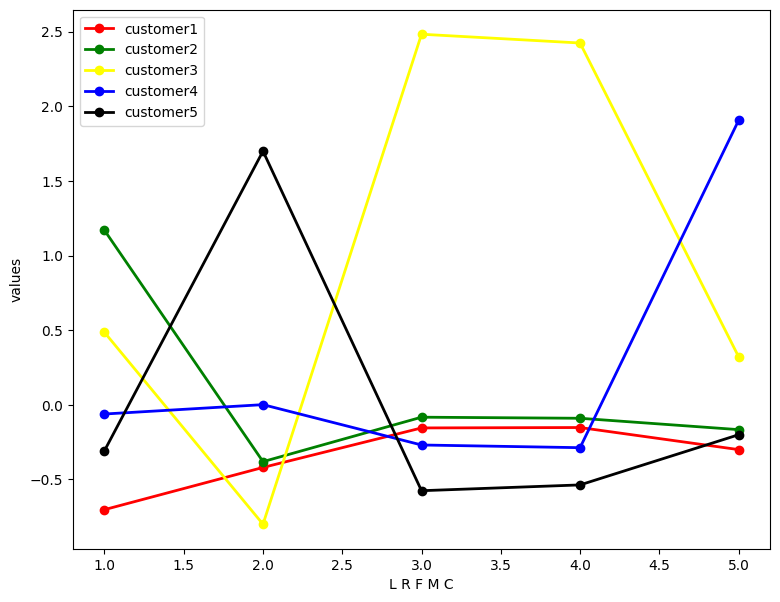

<Figure size 900x700 with 0 Axes>

In [11]:
##绘制折线图分析
plt.rc('figure',figsize=(9,7))
clu=kmodel.cluster_centers_ #聚类中心的数据点
x=[1,2,3,4,5]
colors=['red','green','yellow','blue','black']
for i in range(5): 
 plt.plot(x,clu[i],label='customer'+str(i+1),linewidth=2,color=colors[i],marker='o')
 
plt.xlabel('L R F M C')
plt.ylabel('values')
plt.legend()
plt.show()
plt.savefig('客户分析.png')